# FordGo Bike - Trip Data

### Overview:
* In this presentation we will do some invistigation for Ford GoBike System Dataset

### Dataset 
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area in **Feb2019**

> The dataset after cleaning contains 174952 trips with 17 features. 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns;

%matplotlib inline

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata-clean.csv')
df.sample(5)

,duration_sec,start_time,end_time,start_station_name,start_station_latitude,start_station_longitude,end_station_name,end_station_latitude,end_station_longitude,user_type,member_gender,bike_share_for_all_trip,age,start_day,start_week,end_day,end_week
81646,173,2019-02-17 15:07:10.432,2019-02-17 15:10:03.607,Koshland Park,37.773414,-122.427317,Laguna St at Hayes St,37.776435,-122.426244,Subscriber,Male,No,35,17,Sunday,17,Sunday
11854,1063,2019-02-27 17:32:20.516,2019-02-27 17:50:04.276,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,24th St at Bartlett St,37.752105,-122.419724,Subscriber,Male,No,39,27,Wednesday,27,Wednesday
82642,871,2019-02-17 12:14:31.028,2019-02-17 12:29:02.256,24th St at Chattanooga St,37.751819,-122.426614,7th St at Brannan St,37.773492,-122.403672,Subscriber,Male,No,55,17,Sunday,17,Sunday
90615,398,2019-02-15 15:06:51.394,2019-02-15 15:13:30.252,Salesforce Transit Center (Natoma St at 2nd St),37.787492,-122.398285,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,Subscriber,Male,No,41,15,Friday,15,Friday
54430,475,2019-02-21 08:41:30.652,2019-02-21 08:49:26.527,Webster St at Grove St,37.777053,-122.429558,11th St at Bryant St,37.770030,-122.411726,Subscriber,Male,No,29,21,Thursday,21,Thursday


In [3]:
# helper function

def label(x, y, t):
    """
    Args:
    x (str): x-axis label
    y (str): y-axis label
    t (str): plot title
    
    Returns:
    None
    """
    
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    
    plt.show()

## Duration Distribution

### 1. Acual

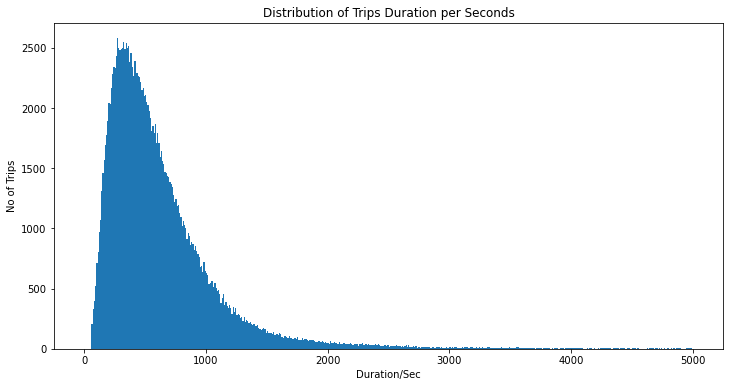

In [4]:
# start with trip duration histogram
binsize = 10
xlim = 10000 / 2 # seconds
bins = np.arange(0, xlim+binsize, binsize)

plt.figure(figsize=(12, 6))
plt.hist(data = df, x = 'duration_sec', bins = bins)
label(x='Duration/Sec', y='No of Trips', t='Distribution of Trips Duration per Seconds')

**Would be better to use log scale instead of limitaions**

### 2. Scaled

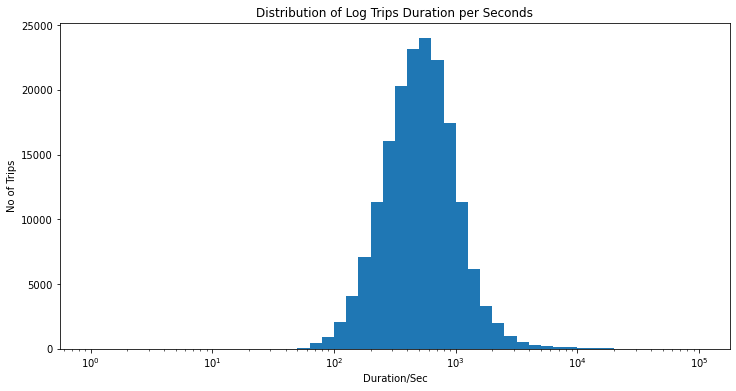

In [5]:
# log trip duration histogram
bins = 10 ** np.arange(0, np.log10(df['duration_sec'].max())+0.1, 0.1)

plt.figure(figsize=(12, 6))
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')

label(x='Duration/Sec', y='No of Trips', t='Distribution of Log Trips Duration per Seconds')

> **Distribution are symmetric with peak value at 500 second ~(about 8 minutes) which reasonable for a short rides.**

### Bikes Share and User Type

In [6]:
bike_counts = df['bike_share_for_all_trip'].value_counts()
bike_counts

No     157606
Yes     17346
Name: bike_share_for_all_trip, dtype: int64

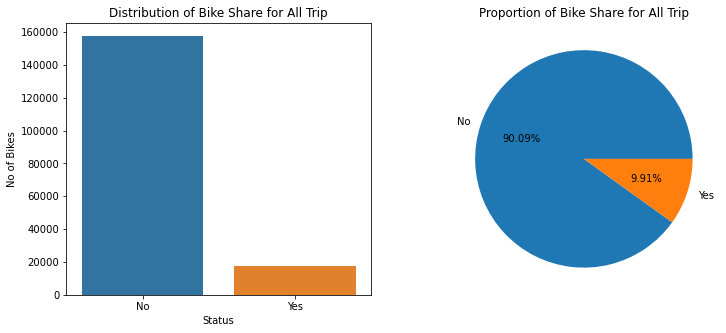

In [7]:
# let's now show no of bike_share_for_all_trip

plt.figure(figsize=[12, 5])

plt.subplot(1, 2, 1)
sns.countplot(data = df, x = 'bike_share_for_all_trip')

plt.title('Distribution of Bike Share for All Trip')
plt.ylabel('No of Bikes')
plt.xlabel('Status')


plt.subplot(1, 2, 2)
plt.pie(bike_counts, labels = bike_counts.index, autopct='%1.2f%%')
plt.title('Proportion of Bike Share for All Trip')

plt.show()

> **The following figure show that +90% of users does not share the bikes for all trip.**

In [8]:
user_counts = df['user_type'].value_counts()
user_counts

Subscriber    158386
Customer       16566
Name: user_type, dtype: int64

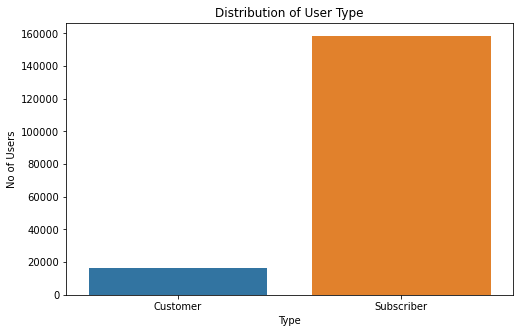

In [9]:
# let's now show no of user_type

plt.figure(figsize=[8, 5])

sns.countplot(data = df, x = 'user_type')
label(x='Type', y='No of Users', t='Distribution of User Type')

>**The following figure show that +90% of users are subscribers and only +9% are customers.**

### Start and End Stations

In [10]:
st_staions = df.start_station_name.value_counts()[:15]
end_staions = df.end_station_name.value_counts()[:15]

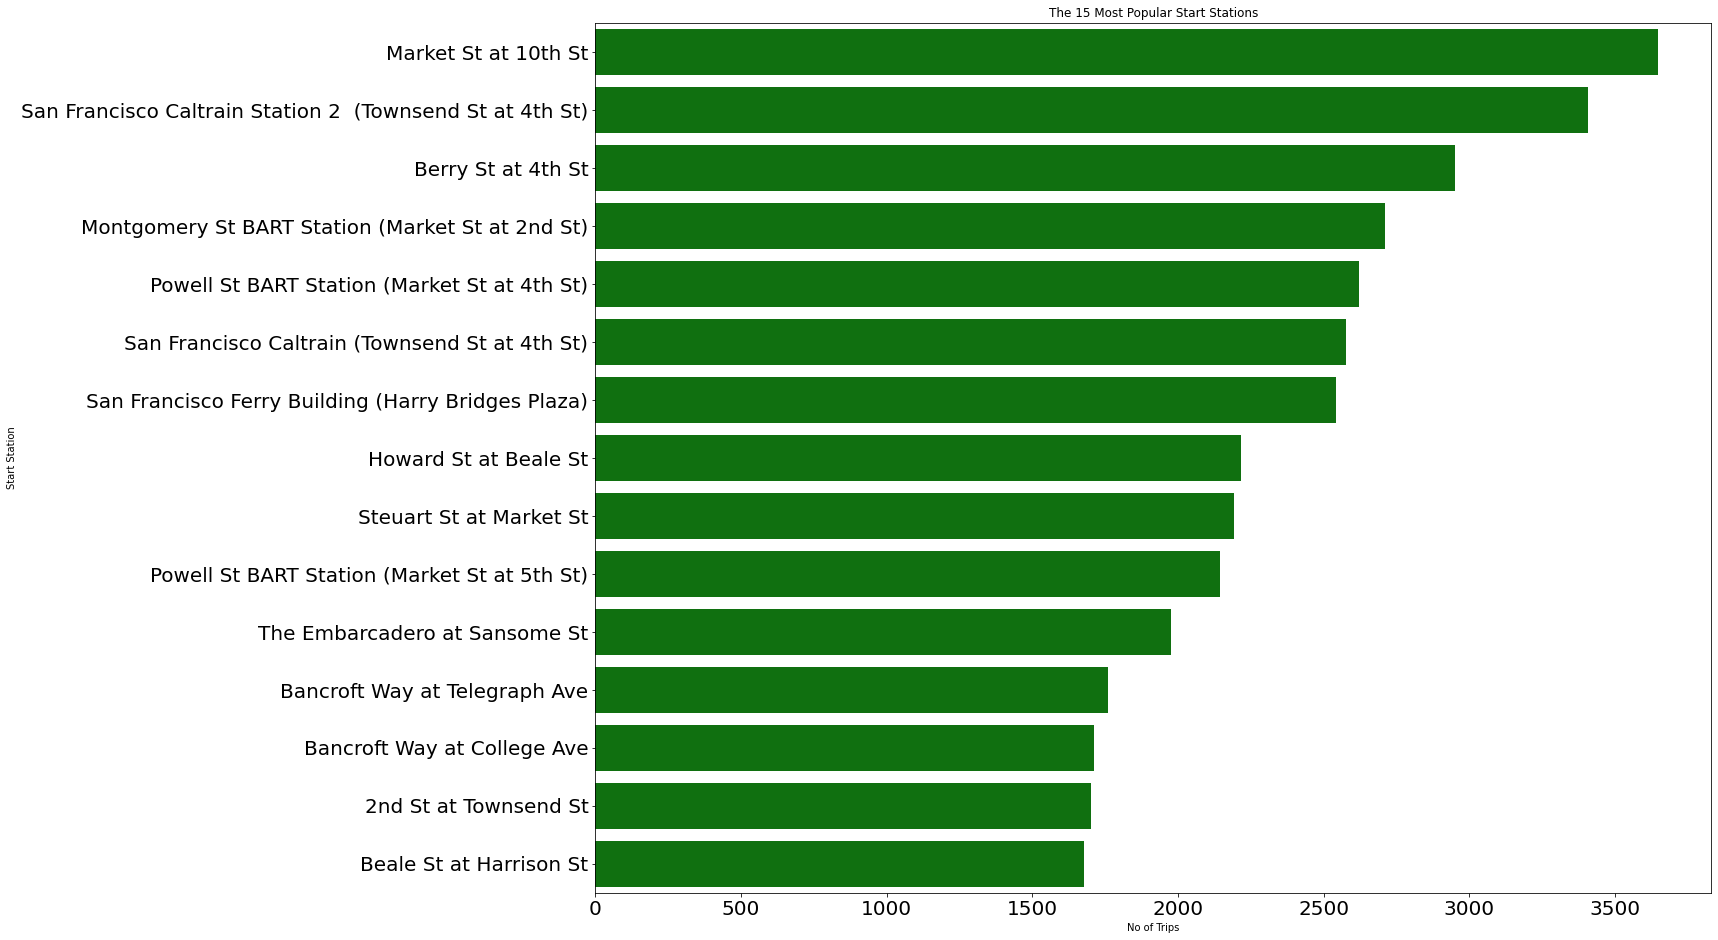

In [11]:
# start staion
plt.figure(figsize=[20, 16])

sns.barplot(y=st_staions.index, x= st_staions, color='g')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

label(y='Start Station', x='No of Trips', t='The 15 Most Popular Start Stations')

> **The avarage No. of trips between Top-15 start staion is +1.5K trip, and most strat station has +3.5K trip this month (Feb2019)**

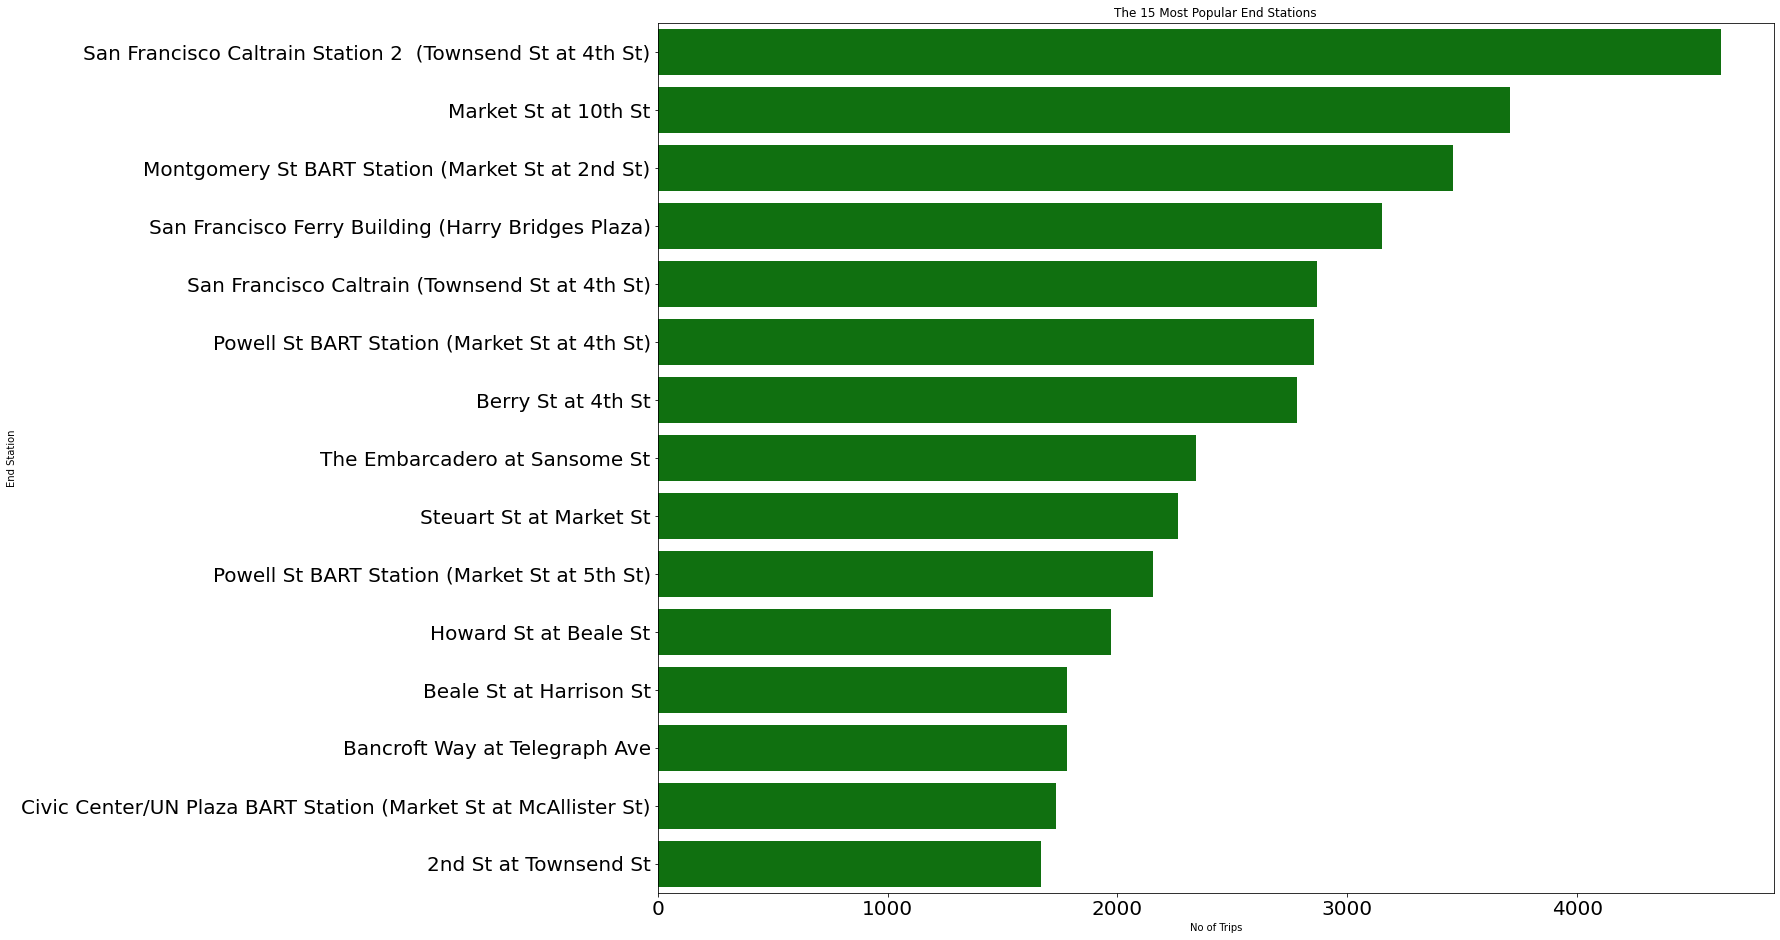

In [12]:
# end staion
plt.figure(figsize=[20, 16])

sns.barplot(y=end_staions.index, x= end_staions, color='g')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

label(y='End Station', x='No of Trips', t='The 15 Most Popular End Stations')

> **The avarage No. of trips between Top-15 end staion is +1K trip, and most end station has +4K trip this month (Feb2019)**

### Gender

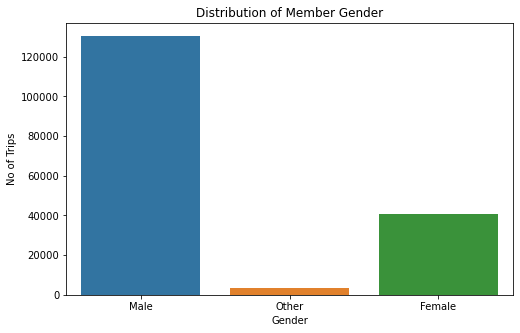

In [13]:
# let's now show no of user_type

plt.figure(figsize=[8, 5])

sns.countplot(data = df, x = 'member_gender')

label(x='Gender', y='No of Trips', t='Distribution of Member Gender')

> **The figure show that most user are men with No. of trips exceed +120K. Female has made +40K trips this month**

## Age

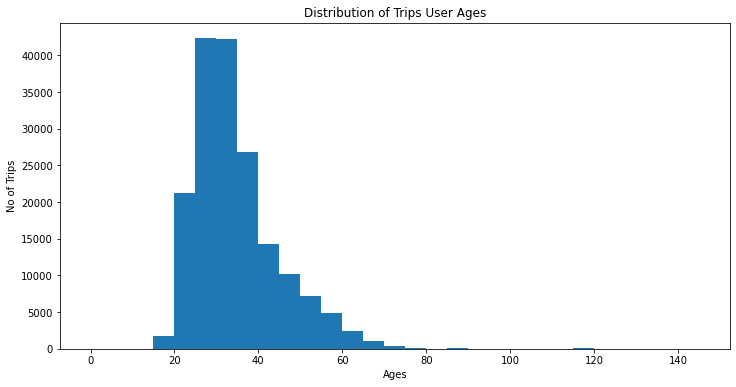

In [14]:
# start with trip duration histogram
binsize = 5
bins = np.arange(0, df['age'].max()+binsize, binsize)

plt.figure(figsize=(12, 6))
plt.hist(data = df, x = 'age', bins = bins)
label(x='Ages', y='No of Trips', t='Distribution of Trips User Ages')

> **Most of user ages between 20-60 years old. with peak +40K trip for users who has 30-35 year.**

### Station Locations

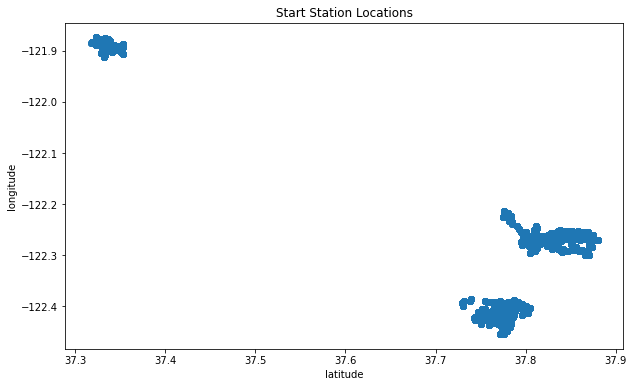

In [15]:
# start staions location

plt.figure(figsize=(10, 6))
plt.scatter(data=df, x='start_station_latitude', y='start_station_longitude');
label(x='latitude', y='longitude', t='Start Station Locations')

> **Most of strater staions can be converted into 3 main clusters (Location)**

### Days and Day of Week

In [16]:
df['start_time'] = pd.to_datetime(df['start_time'])

df['start_day'] = df['start_time'].dt.day
df['start_week'] = df['start_time'].dt.day_name() # day_of_week

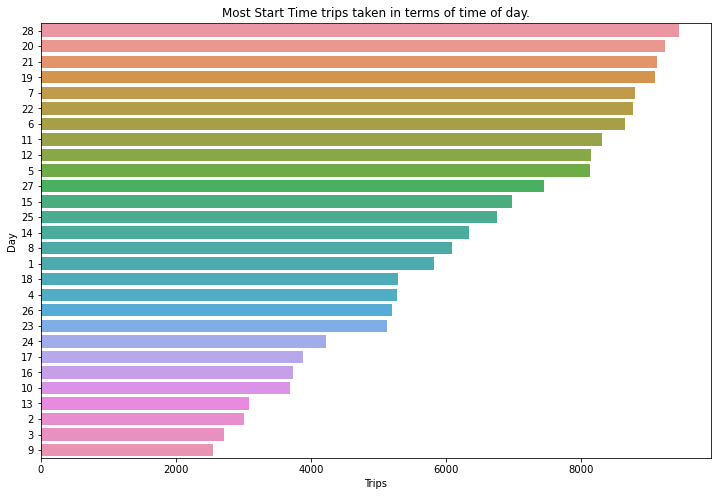

In [17]:
# start time day
days_count = df.start_day.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='start_day', order=days_count.index);
label(x='Trips', y='Day', t='Most Start Time trips taken in terms of time of day.')

> **Most user do starter trips at the last quarter  of the month and do lower trips at first quarters**

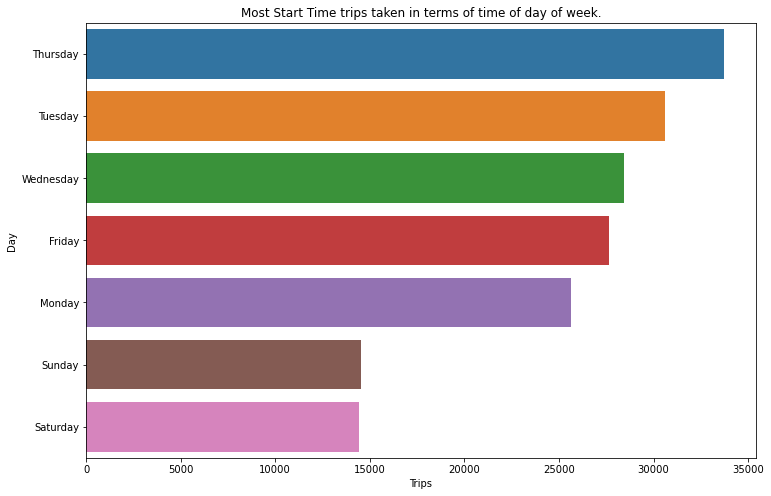

In [18]:
# start time day of week
days_count = df.start_week.value_counts()

plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='start_week', order=days_count.index);
label(x='Trips', y='Day', t='Most Start Time trips taken in terms of time of day of week.')


> **Most of starter trips happened at Thursday (Weekend) and do lower trips Saturday**

## Data Correlations

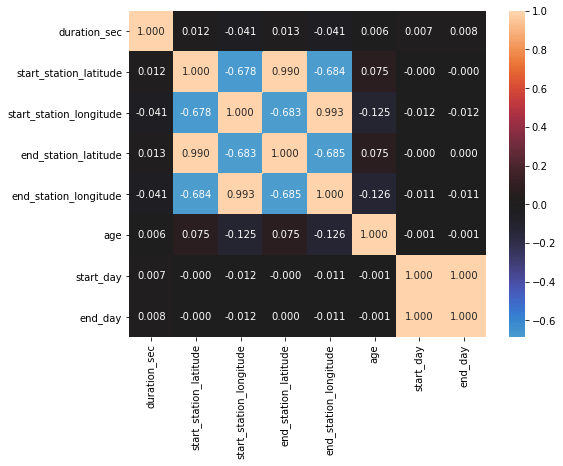

In [19]:
# lets now display the correlation between variables using heatmap
plt.figure(figsize = [8, 6])
corr = df.corr()
sns.heatmap(corr, 
            annot = True, 
            fmt = '.3f', 
            center = 0)
plt.show()

> **Strong correlation appearance between similar type features like locations and dates. and low correlation between other features**

### **Relation between Duration, Age and Gender?**

In [20]:
st_df = df.groupby('start_station_name')[['duration_sec', 'age']].mean()

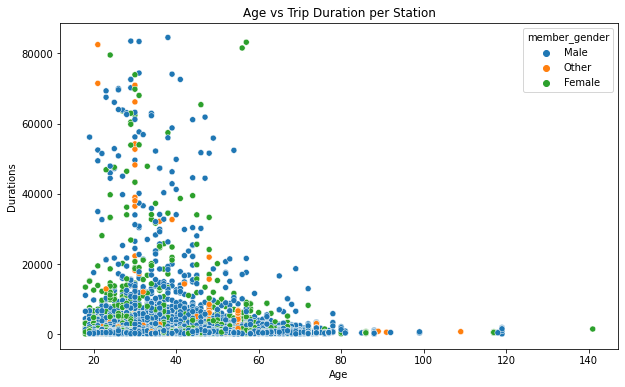

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='duration_sec', hue='member_gender')
label(x='Age', y='Durations', t='Age vs Trip Duration per Station')

> **Most distribution consist from mid age users, high duration does not depend on gender because all genders exist at the top of plot.**

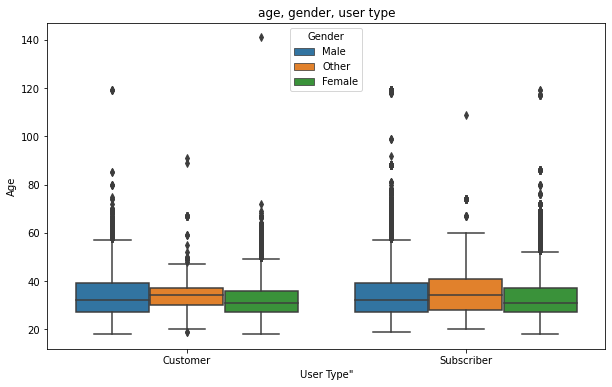

In [22]:
# let's get the relation between age, gender, user type
plt.figure(figsize=(10, 6))

sns.boxplot(data = df, x = 'user_type',  y = 'age', hue='member_gender')

plt.legend(title="Gender")
label(y='Age', x='User Type"', t='age, gender, user type')

> **Range (variance) of subscribers are slightly larger than customers.**

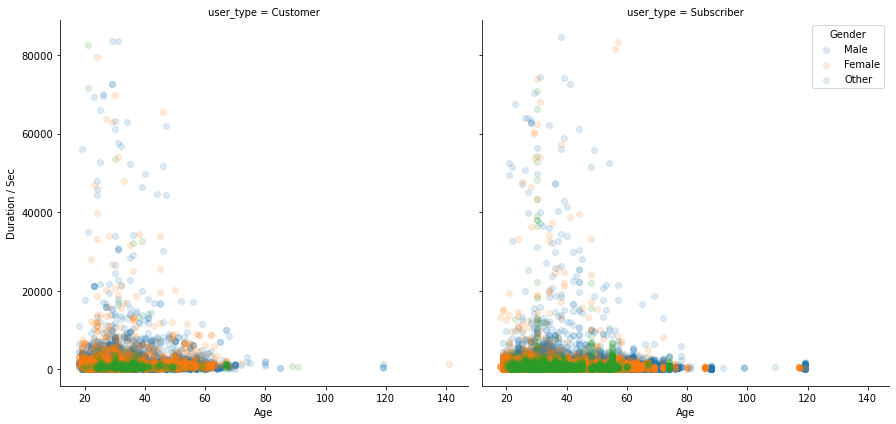

In [23]:
# let's display the relation between duration, age, user type, gender feature
# create faceted heat maps on the user type variable
graph = sns.FacetGrid(data = df, 
                      col = 'user_type', 
                      hue='member_gender', 
                      hue_order=['Male','Female','Other'], 
                      col_wrap = 6, height = 6
                     )

graph.map(plt.scatter, 'age', 'duration_sec', alpha=0.15)
graph.set_xlabels('Age')
graph.set_ylabels('Duration / Sec')
plt.legend(title="Gender")
plt.show()

> **Mid age and older users from both type shows high trip durations.**

###  Station Latitude and Longitude (Locations) Relationships.

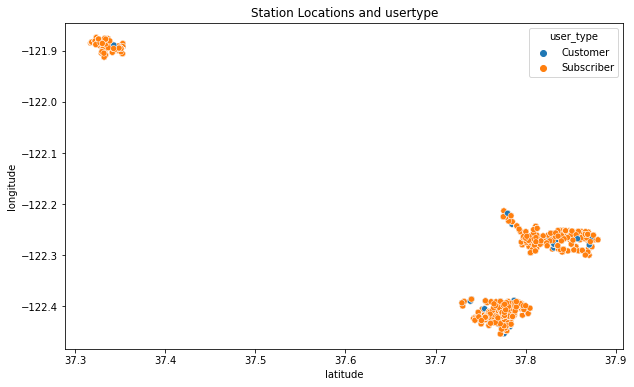

In [24]:
### Station Latitude and Longitude and UserType

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='start_station_latitude', 
                y='start_station_longitude', 
                hue='user_type');

label(y='longitude', x='latitude', t="Station Locations and usertype")

> **Subscriber users spread across the 3 main staions locations (clusters), there is few customer users existing in the upper right cluster.**

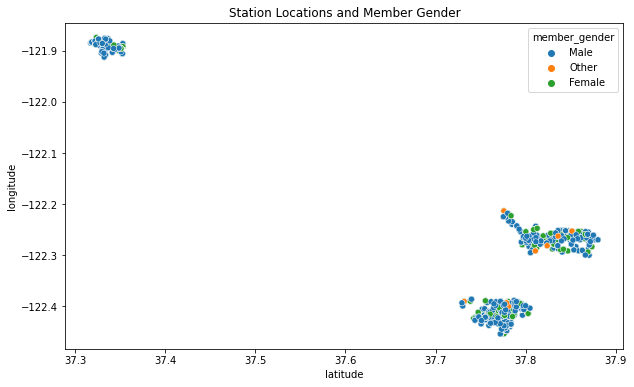

In [25]:
### Station Latitude and Longitude and member_gender

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='start_station_latitude', 
                y='start_station_longitude', 
                hue='member_gender');
label(y='longitude', x='latitude', t="Station Locations and Member Gender")

> **Male uses the 3 main locations (clusters) more than Females.**

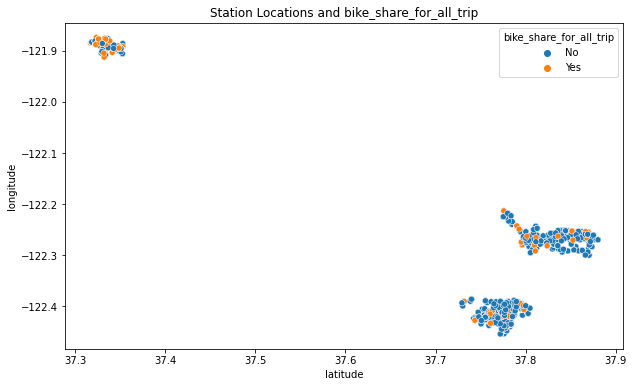

In [26]:
### Station Latitude and Longitude and bike_share_for_all_trip

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, 
                x='start_station_latitude', 
                y='start_station_longitude', 
                hue='bike_share_for_all_trip');

label(y='longitude', x='latitude', t="Station Locations and bike_share_for_all_trip")

> **User who started thire journey from the left cluster are more likely to share bike for all trip than users who use bikes from both right locations.**

### Conclusions:
- High duration trips does not related to gender but and most trips consist of mid age users.
- Age range of subscribers user type are slightly larger than customers.
- Subscriber users uses the 3 main staions locations more than other users types.
- Male spread on the 3 main locations (clusters) more than Females.
- User who started thire journey from the left cluster are more likely to share bike for all trip than users who use bikes from both right locations.